<a href="https://colab.research.google.com/github/jqwhite/PhysBioCell/blob/main/2_1_FRAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diffusion in 1-dimension and application to FRAP

***

In this tutorial, we will use numerical methods to estimate the probability distributions directly from the diffusion equation given by

\begin{align}
p(n, t) = p(n, t - \Delta t) + k \, \Delta t \, p(n-1, t - \Delta t) + k \, \Delta t \, p(n+1, t - \Delta t) - 2k \, \Delta t \, p(n,t - \Delta t). \tag{1}
\end{align}

This equation, called "the master equation," allows us to calculate the probability of the walker being at position $n$ at the time step $t$, given the probabilites at the previous time step $t - \Delta t$. $k$ is the hopping rate between neighboring positions, and $\Delta t$ is the time step used in the numerical calculation.

To impose hard boundary conditions at the edges so that no new material shows
up from the outside, we will modify the master equation at the boundaries to be

\begin{align}
p(0,t) &= p(0, t - \Delta t) + k \, \Delta t \, p(1, t - \Delta t) - k \, \Delta t \, p(0,t - \Delta t), \tag{2} \\
p(N,t) &= p(N, t - \Delta t) + k \, \Delta t \, p(N-1, t - \Delta t) - k \, \Delta t \, p(N,t - \Delta t), \tag{3}
\end{align}

where $N$ is the index of the rightmost position. To get a better sense for the effect of
diffusion on the probability distribution, we will examine two initial
conditions and similar to the numerical simulation of *E. coli* population
growth, we will program an updating scheme for the probability distribution
both in space and in time.

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

# for those who are interested in generating interactive plots
import panel as pn
pn.extension()

## Set up some parameters

In [178]:
# number of boxes
nboxes = 50

# time interval
dt = 0.1

# number of steps
nsteps = 100

# hopping rate constant

k = 1


In [179]:
# want 2D matrix where one row is unit of time and columns are content of boxes

p = np.zeros((nboxes, nsteps))

# initial position (middle of array)
x0 = nboxes//2

# initial condition
p[x0,0] = 1 # everything is at 25

In [180]:
for t in range(1,nsteps):
  # interior region
  for n in range(1,nboxes-1):
    p[n,t] = p[n, t-1] + dt*k*p[n-1,t-1] + dt*k*p[n+1,t-1] - 2*k*dt*p[n,t-1]

  # boundary cases
  p[0,t]  = p[ 0, t-1] + dt*k*p[n+1,t-1] - k*dt*p[ 0,t-1]
  p[-1,t] = p[-1, t-1] + dt*k*p[ -2,t-1] - k*dt*p[-1,t-1]

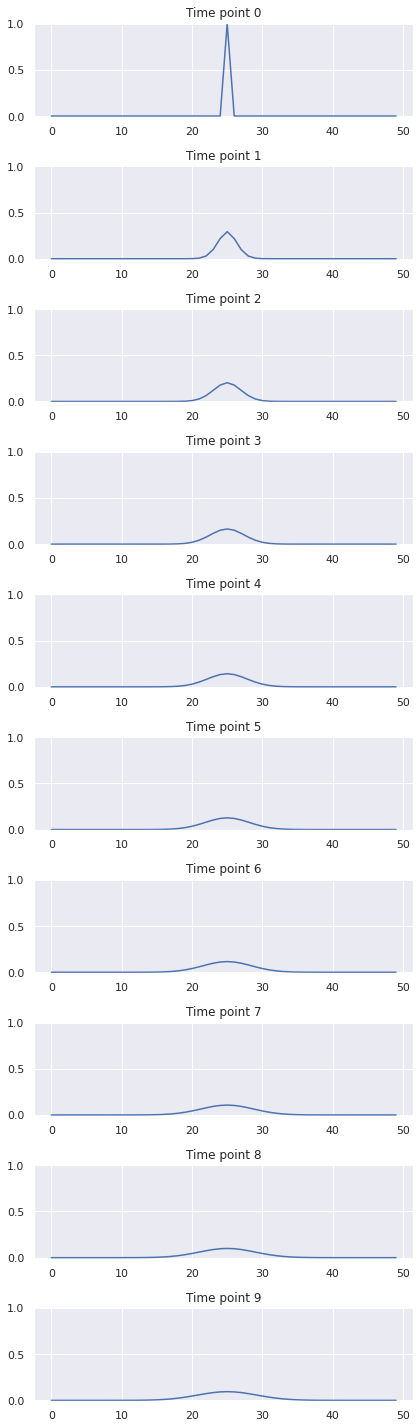

In [181]:
fig,ax = plt.subplots(10,1,figsize=(6,20))

for n in range(len(ax)):
  ax[n].plot(p[:, 10*n])
  ax[n].set_title(f"Time point {n}")
  ax[n].set_ylim([-0.01,1.01])
  
fig.tight_layout();

In [182]:
x_array = np.linspace(1, nboxes, 500)

# time array for gaussian

timepoints    = np.arange(nsteps)*dt
timepoints[0] = 0.001

# define diffusion constant
# a**2 is one
D = k

# create array for gaussian
gaussian = np.zeros((len(x_array), len(timepoints)))

In [183]:
for nt, time in enumerate(timepoints):
  denominator = (4*np.pi*D*time)**0.5
  # print(denominator)
  exponential = - (x_array - x0)**2  / (4*D*time)
  # print(exponential)
  gaussian[:, nt] = 1/denominator*np.exp(exponential)

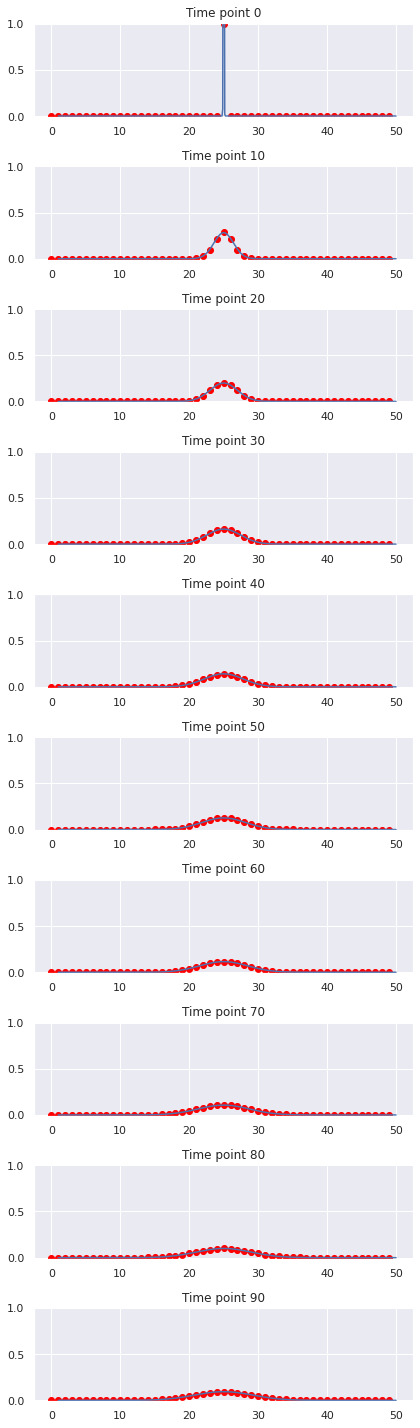

In [184]:
fig,ax = plt.subplots(10,1,figsize=(6,20))

for n in range(len(ax)):
  ax[n].scatter(range(nboxes), p[:,10*n], color='red', marker='o')
  ax[n].plot(x_array, gaussian[:, 10*n])
  ax[n].set_title(f"Time point {10*n}")
  ax[n].set_ylim([-0.01,1.01])
  
fig.tight_layout();

##FRAP

In [220]:
# number of boxes
nboxes = 100

# time interval
dt = 0.1

# number of steps
nsteps = 10000

# hopping rate constant
k = 1

In [234]:
# want 2D matrix where one row is unit of time and columns are content of boxes

p = np.zeros((nboxes, nsteps))

# initial condition
p[:][0:25] = 1 # first 25 to one
p[:][75:]  = 1 # last 25 to one
# p[:,0]
# sum(p[:,0])
p[:][0:25] = 1/sum(p[:,0]) # first 25 to one
p[:][75:]  = 1/sum(p[:,0]) # last 25 to one

In [235]:
def frap(p):

  for t in range(1,nsteps):
    # interior region
    for n in range(1,nboxes-1):
      p[n,t] = p[n, t-1] + dt*k*p[n-1,t-1] + dt*k*p[n+1,t-1] - 2*k*dt*p[n,t-1]

    # boundary cases
    p[0,t]  = p[ 0, t-1] + dt*k*p[n+1,t-1] - k*dt*p[ 0,t-1]
    p[-1,t] = p[-1, t-1] + dt*k*p[ -2,t-1] - k*dt*p[-1,t-1]

  return p

In [236]:
f=frap(p)

In [224]:
# p[0]

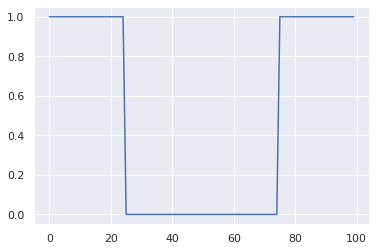

In [225]:
plt.plot(f[:,0]);

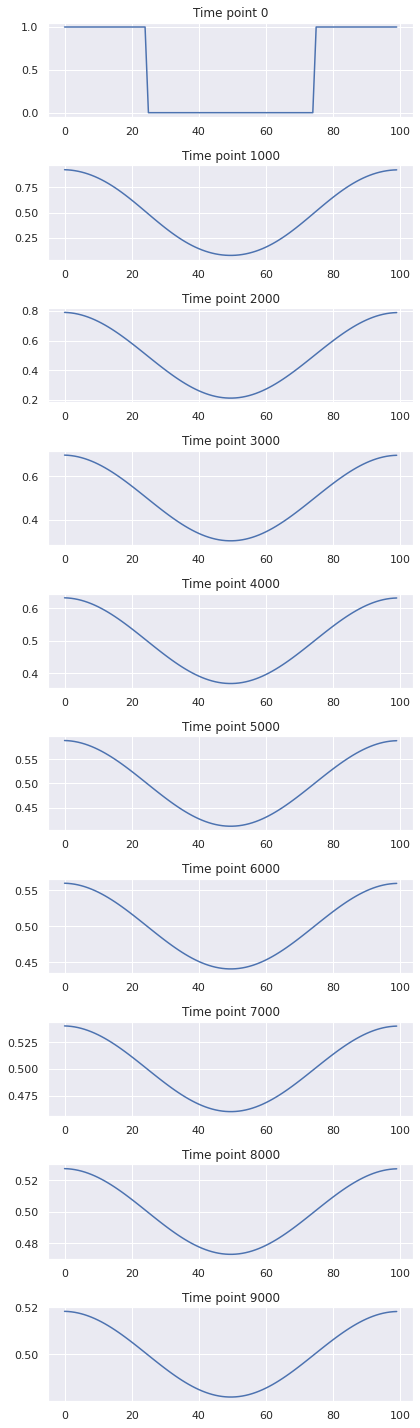

In [228]:
fig,ax = plt.subplots(10,1,figsize=(6,20))

every_n = nsteps//len(ax)

for n in range(len(ax)):
  # ax[n].scatter(range(nboxes), p[:,10*n], color='red', marker='o')
  ax[n].plot(f[:,n*every_n])
  ax[n].set_title(f"Time point {n*every_n}")
#   ax[n].set_ylim([-0.01,1.01])
  
fig.tight_layout();